In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import math
import numpy as np
from sklearn.datasets import make_friedman2
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [7]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
import Kan_NN
import importlib
importlib.reload(Kan_NN)

<module 'Kan_NN' from 'c:\\Users\\JP\\Documents\\TU Berlin\\Master\\Code_clean\\Kan_NN.py'>

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman3
def get_loader(noise, n_samples=20000):
    # Set the seed for reproducibility
    seed = 42
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Generate the Friedman dataset
    X_train, y_train = make_friedman3(n_samples=int(n_samples * 0.8), random_state=seed, noise=noise)
    X_test, y_test = make_friedman3(n_samples=int(n_samples * 0.2), random_state=seed, noise=0.0)

    # Reshape targets to match expected input dimensions
    y_train = np.expand_dims(y_train, axis=1)
    y_test = np.expand_dims(y_test, axis=1)

    # Apply feature scaling (Standardization) ONLY to `X`
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)  # Fit and transform training data
    X_test = scaler_X.transform(X_test)        # Transform test data (using train stats)
    # Convert numpy arrays to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # Keep `y` unchanged
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)    # Keep `y` unchanged

    # Create TensorDataset for train and test sets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    # Set batch size and create DataLoader for training and testing
    batch_size = 1024
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

    return train_loader, test_loader

In [9]:
@torch.no_grad()
def compute_test_loss(test_loader, model):
    criterion = torch.nn.MSELoss()
    running_loss = 0.
    for batch, target in test_loader:
        outputs = model(batch)
        loss = criterion(target, outputs)
        running_loss += loss.item()
    return running_loss / len(test_loader)

4 0 [32]
Epoch [1/1000], Loss: 2.412385, test: 2.088651, lr: 0.001000
Epoch [2/1000], Loss: 1.821533, test: 1.481649, lr: 0.001000
Epoch [3/1000], Loss: 1.135622, test: 0.621606, lr: 0.001000
Epoch [4/1000], Loss: 0.254918, test: 0.185529, lr: 0.001000
Epoch [5/1000], Loss: 0.113756, test: 0.094451, lr: 0.001000
Epoch [6/1000], Loss: 0.080977, test: 0.074011, lr: 0.001000
Epoch [7/1000], Loss: 0.067176, test: 0.064787, lr: 0.001000
Epoch [8/1000], Loss: 0.060080, test: 0.058675, lr: 0.001000
Epoch [9/1000], Loss: 0.054354, test: 0.053130, lr: 0.001000
Epoch [10/1000], Loss: 0.048809, test: 0.046604, lr: 0.001000
Epoch [11/1000], Loss: 0.040823, test: 0.036092, lr: 0.001000
Epoch [12/1000], Loss: 0.029694, test: 0.024537, lr: 0.001000
Epoch [13/1000], Loss: 0.020738, test: 0.018604, lr: 0.001000
Epoch [14/1000], Loss: 0.016542, test: 0.015510, lr: 0.001000
Epoch [15/1000], Loss: 0.014095, test: 0.013417, lr: 0.001000
Epoch [16/1000], Loss: 0.012212, test: 0.012009, lr: 0.001000
Epoch [1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.000022, test: 0.000035, lr: 0.001000


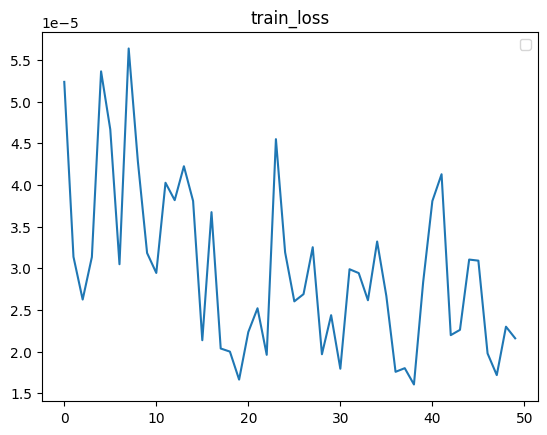

Training Complete!
4 0.2 [32]
Epoch [1/1000], Loss: 2.457346, test: 2.088912, lr: 0.001000
Epoch [2/1000], Loss: 1.866219, test: 1.482486, lr: 0.001000
Epoch [3/1000], Loss: 1.179721, test: 0.622407, lr: 0.001000
Epoch [4/1000], Loss: 0.295567, test: 0.186917, lr: 0.001000
Epoch [5/1000], Loss: 0.153459, test: 0.094124, lr: 0.001000
Epoch [6/1000], Loss: 0.120700, test: 0.074169, lr: 0.001000
Epoch [7/1000], Loss: 0.106897, test: 0.064778, lr: 0.001000
Epoch [8/1000], Loss: 0.099636, test: 0.058771, lr: 0.001000
Epoch [9/1000], Loss: 0.094011, test: 0.053212, lr: 0.001000
Epoch [10/1000], Loss: 0.088751, test: 0.046788, lr: 0.001000
Epoch [11/1000], Loss: 0.080938, test: 0.036455, lr: 0.001000
Epoch [12/1000], Loss: 0.070043, test: 0.024902, lr: 0.001000
Epoch [13/1000], Loss: 0.061096, test: 0.018748, lr: 0.001000
Epoch [14/1000], Loss: 0.056978, test: 0.015858, lr: 0.001000
Epoch [15/1000], Loss: 0.054549, test: 0.014029, lr: 0.001000
Epoch [16/1000], Loss: 0.053190, test: 0.012602, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.039866, test: 0.001328, lr: 0.001000


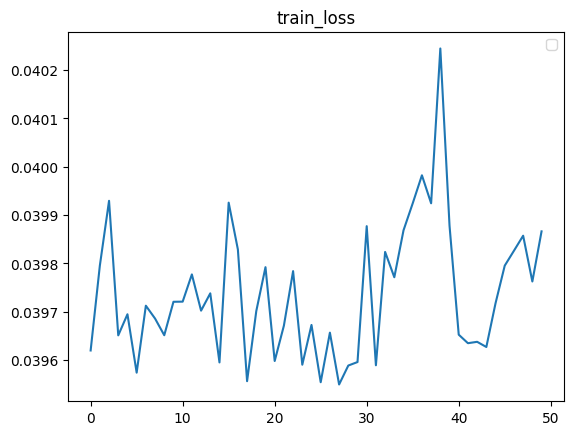

Training Complete!
4 0.5 [32]
Epoch [1/1000], Loss: 2.676607, test: 2.088810, lr: 0.001000
Epoch [2/1000], Loss: 2.084321, test: 1.482693, lr: 0.001000
Epoch [3/1000], Loss: 1.397333, test: 0.622476, lr: 0.001000
Epoch [4/1000], Loss: 0.507968, test: 0.189170, lr: 0.001000
Epoch [5/1000], Loss: 0.364891, test: 0.093531, lr: 0.001000
Epoch [6/1000], Loss: 0.332485, test: 0.074362, lr: 0.001000
Epoch [7/1000], Loss: 0.318695, test: 0.064839, lr: 0.001000
Epoch [8/1000], Loss: 0.310992, test: 0.059015, lr: 0.001000
Epoch [9/1000], Loss: 0.305889, test: 0.053453, lr: 0.001000
Epoch [10/1000], Loss: 0.301128, test: 0.047255, lr: 0.001000
Epoch [11/1000], Loss: 0.293618, test: 0.037624, lr: 0.001000
Epoch [12/1000], Loss: 0.283418, test: 0.026618, lr: 0.001000
Epoch [13/1000], Loss: 0.274707, test: 0.019388, lr: 0.001000
Epoch [14/1000], Loss: 0.269596, test: 0.016706, lr: 0.001000
Epoch [15/1000], Loss: 0.267061, test: 0.015515, lr: 0.001000
Epoch [16/1000], Loss: 0.267161, test: 0.013779, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.247608, test: 0.006124, lr: 0.001000


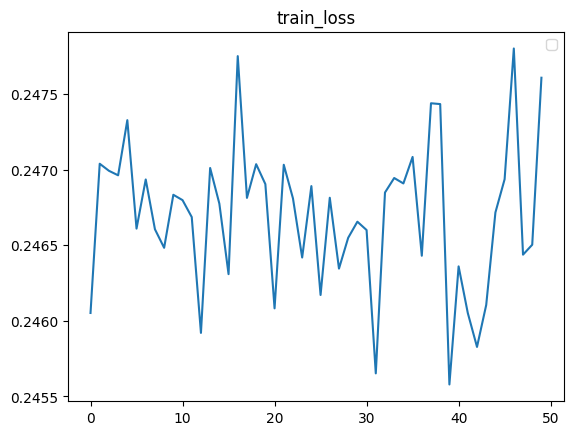

Training Complete!
4 1.0 [32]
Epoch [1/1000], Loss: 3.447486, test: 2.088680, lr: 0.001000
Epoch [2/1000], Loss: 2.852481, test: 1.482977, lr: 0.001000
Epoch [3/1000], Loss: 2.166216, test: 0.622448, lr: 0.001000
Epoch [4/1000], Loss: 1.266849, test: 0.192618, lr: 0.001000
Epoch [5/1000], Loss: 1.122140, test: 0.092737, lr: 0.001000
Epoch [6/1000], Loss: 1.091235, test: 0.074880, lr: 0.001000
Epoch [7/1000], Loss: 1.077618, test: 0.065168, lr: 0.001000
Epoch [8/1000], Loss: 1.068626, test: 0.059712, lr: 0.001000
Epoch [9/1000], Loss: 1.065401, test: 0.054153, lr: 0.001000
Epoch [10/1000], Loss: 1.061678, test: 0.048531, lr: 0.001000
Epoch [11/1000], Loss: 1.054521, test: 0.040641, lr: 0.001000
Epoch [12/1000], Loss: 1.045626, test: 0.031529, lr: 0.001000
Epoch [13/1000], Loss: 1.038760, test: 0.022792, lr: 0.001000
Epoch [14/1000], Loss: 1.029435, test: 0.018377, lr: 0.001000
Epoch [15/1000], Loss: 1.025627, test: 0.018678, lr: 0.001000
Epoch [16/1000], Loss: 1.029140, test: 0.015038, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.987130, test: 0.029677, lr: 0.001000


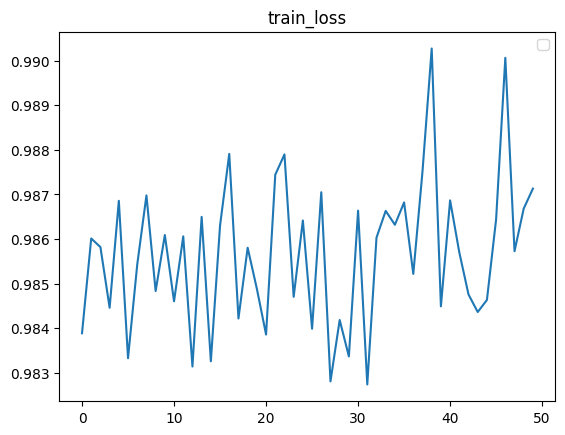

Training Complete!
4 0 [128]
Epoch [1/1000], Loss: 1.934478, test: 1.132466, lr: 0.001000
Epoch [2/1000], Loss: 0.522920, test: 0.226411, lr: 0.001000
Epoch [3/1000], Loss: 0.126946, test: 0.108502, lr: 0.001000
Epoch [4/1000], Loss: 0.094607, test: 0.076835, lr: 0.001000
Epoch [5/1000], Loss: 0.044176, test: 0.029360, lr: 0.001000
Epoch [6/1000], Loss: 0.018384, test: 0.011846, lr: 0.001000
Epoch [7/1000], Loss: 0.009668, test: 0.008253, lr: 0.001000
Epoch [8/1000], Loss: 0.007130, test: 0.006934, lr: 0.001000
Epoch [9/1000], Loss: 0.005976, test: 0.005891, lr: 0.001000
Epoch [10/1000], Loss: 0.004996, test: 0.004914, lr: 0.001000
Epoch [11/1000], Loss: 0.004149, test: 0.004012, lr: 0.001000
Epoch [12/1000], Loss: 0.003327, test: 0.003267, lr: 0.001000
Epoch [13/1000], Loss: 0.002626, test: 0.002698, lr: 0.001000
Epoch [14/1000], Loss: 0.002131, test: 0.002219, lr: 0.001000
Epoch [15/1000], Loss: 0.001738, test: 0.001978, lr: 0.001000
Epoch [16/1000], Loss: 0.001551, test: 0.001703, l

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.000026, test: 0.000025, lr: 0.001000


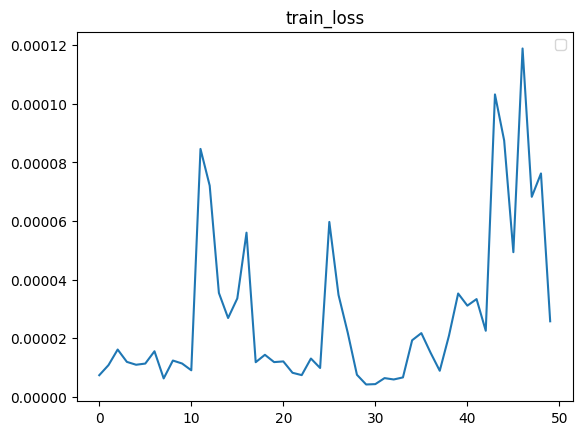

Training Complete!
4 0.2 [128]
Epoch [1/1000], Loss: 1.977628, test: 1.111552, lr: 0.001000
Epoch [2/1000], Loss: 0.514524, test: 0.210643, lr: 0.001000
Epoch [3/1000], Loss: 0.158092, test: 0.104361, lr: 0.001000
Epoch [4/1000], Loss: 0.130756, test: 0.079137, lr: 0.001000
Epoch [5/1000], Loss: 0.094527, test: 0.029402, lr: 0.001000
Epoch [6/1000], Loss: 0.062891, test: 0.014436, lr: 0.001000
Epoch [7/1000], Loss: 0.051705, test: 0.010062, lr: 0.001000
Epoch [8/1000], Loss: 0.048698, test: 0.007343, lr: 0.001000
Epoch [9/1000], Loss: 0.046834, test: 0.006097, lr: 0.001000
Epoch [10/1000], Loss: 0.045620, test: 0.005227, lr: 0.001000
Epoch [11/1000], Loss: 0.044707, test: 0.004137, lr: 0.001000
Epoch [12/1000], Loss: 0.043918, test: 0.003490, lr: 0.001000
Epoch [13/1000], Loss: 0.043398, test: 0.003026, lr: 0.001000
Epoch [14/1000], Loss: 0.042967, test: 0.002970, lr: 0.001000
Epoch [15/1000], Loss: 0.042567, test: 0.002518, lr: 0.001000
Epoch [16/1000], Loss: 0.042667, test: 0.002380,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.038723, test: 0.001873, lr: 0.001000


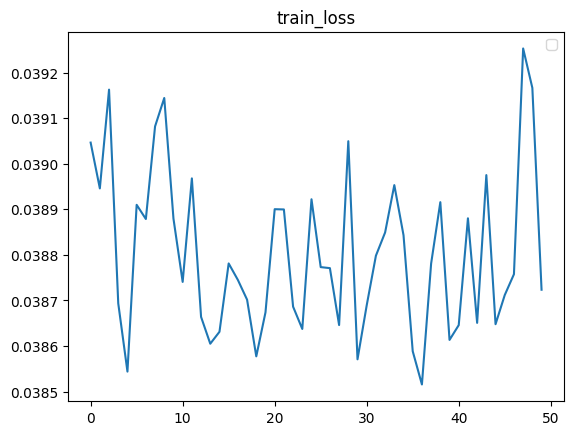

Training Complete!
4 0.5 [128]
Epoch [1/1000], Loss: 2.195169, test: 1.103492, lr: 0.001000
Epoch [2/1000], Loss: 0.720005, test: 0.203156, lr: 0.001000
Epoch [3/1000], Loss: 0.369490, test: 0.102702, lr: 0.001000
Epoch [4/1000], Loss: 0.340685, test: 0.074716, lr: 0.001000
Epoch [5/1000], Loss: 0.302786, test: 0.035896, lr: 0.001000
Epoch [6/1000], Loss: 0.279048, test: 0.018086, lr: 0.001000
Epoch [7/1000], Loss: 0.265794, test: 0.011591, lr: 0.001000
Epoch [8/1000], Loss: 0.263696, test: 0.008135, lr: 0.001000
Epoch [9/1000], Loss: 0.261117, test: 0.007357, lr: 0.001000
Epoch [10/1000], Loss: 0.260236, test: 0.007239, lr: 0.001000
Epoch [11/1000], Loss: 0.259292, test: 0.006073, lr: 0.001000
Epoch [12/1000], Loss: 0.258841, test: 0.005523, lr: 0.001000
Epoch [13/1000], Loss: 0.257952, test: 0.005468, lr: 0.001000
Epoch [14/1000], Loss: 0.257377, test: 0.004556, lr: 0.001000
Epoch [15/1000], Loss: 0.256556, test: 0.003965, lr: 0.001000
Epoch [16/1000], Loss: 0.256901, test: 0.004186,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.237762, test: 0.016344, lr: 0.001000


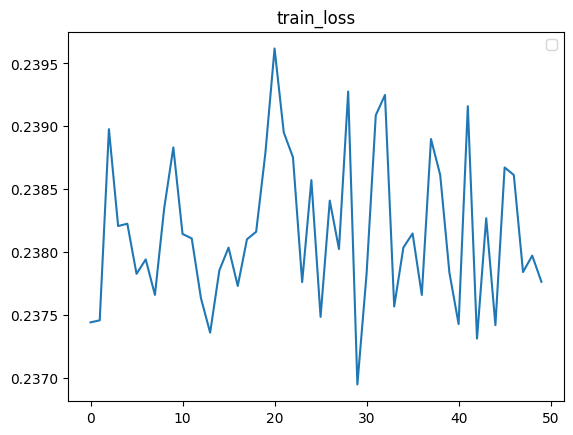

Training Complete!
4 1.0 [128]
Epoch [1/1000], Loss: 2.964253, test: 1.089061, lr: 0.001000
Epoch [2/1000], Loss: 1.465942, test: 0.192536, lr: 0.001000
Epoch [3/1000], Loss: 1.128576, test: 0.100353, lr: 0.001000
Epoch [4/1000], Loss: 1.096847, test: 0.072081, lr: 0.001000
Epoch [5/1000], Loss: 1.066290, test: 0.036849, lr: 0.001000
Epoch [6/1000], Loss: 1.041445, test: 0.020324, lr: 0.001000
Epoch [7/1000], Loss: 1.027345, test: 0.013697, lr: 0.001000
Epoch [8/1000], Loss: 1.027309, test: 0.009497, lr: 0.001000
Epoch [9/1000], Loss: 1.024095, test: 0.008470, lr: 0.001000
Epoch [10/1000], Loss: 1.022495, test: 0.008772, lr: 0.001000
Epoch [11/1000], Loss: 1.019940, test: 0.007207, lr: 0.001000
Epoch [12/1000], Loss: 1.019785, test: 0.006964, lr: 0.001000
Epoch [13/1000], Loss: 1.017985, test: 0.009539, lr: 0.001000
Epoch [14/1000], Loss: 1.018373, test: 0.006945, lr: 0.001000
Epoch [15/1000], Loss: 1.016580, test: 0.005423, lr: 0.001000
Epoch [16/1000], Loss: 1.018328, test: 0.007659,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.951728, test: 0.062008, lr: 0.001000


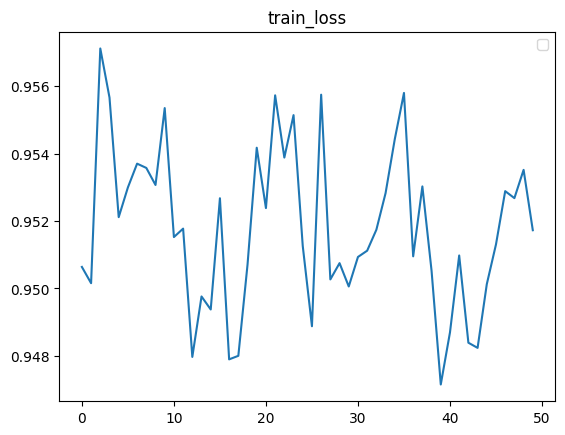

Training Complete!


In [ ]:
import time
import dill
adjust = True 
widths = [[32], [128]]

n_samples = 20000
in_dims = [4]
noises = [0,0.2,0.5,1.]
train_losses = []
test_losses = []
for width in widths:
    for in_dim in in_dims:
        for noise in noises:
            print(in_dim, noise, width)
            shape = [in_dim,13,1,1]
            train_loader, test_loader = get_loader(noise,n_samples)
            model = Kan_NN.Neural_Kan(shape = shape, h = width)
            epochs = 1000
            model.train()
            optimizer = optim.AdamW(model.parameters(), lr=0.001)
            criterion = torch.nn.MSELoss()
            for epoch in range(epochs):
                running_loss = 0.0 
                for batch, target in train_loader:
                    start_time = time.time()
                    optimizer.zero_grad()
                    outputs = model(batch)
                    loss = criterion(target, outputs)
                    loss.backward()
                    #if not adjust:
                    #    torch.nn.utils.clip_grad_norm(model.parameters(), max_norm = 1)
                    optimizer.step()
                    running_loss += loss.item()
                avg_loss = running_loss / len(train_loader)
                model.train_loss.append(avg_loss)
                test_l = compute_test_loss(test_loader, model)
                model.test_loss.append(test_l)
                #if (test_l < 1) and (adjust):
                #    adjust = False
                #    for param_group in optimizer.param_groups:
                #        param_group['lr'] *= 0.1

                print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.6f}, test: {test_l:.6f}, lr: {optimizer.param_groups[0]['lr']:6f}")
            plt.plot(model.train_loss[-50:])
            plt.title(f'train_loss')
            plt.legend()
            plt.show()
            print("Training Complete!")
            with open(f"models/Friedmann_3_KAN_{width[0]}_{noise}_{in_dim}.dill", "wb") as f:
                dill.dump(model, f)
            #with open(f"models/KAN_{width[0]}_{noise}_{in_dim}.dill", "wb") as f:
            #    dill.dump(model, f)



In [ ]:
path = "models/KAN_128_0.5_10.dill"
with open(path, "wb") as f:
    dill.dump(model, f)

In [ ]:
models_KAN = model

In [ ]:
in_dim = 10
noise = 0
X_train, y = make_friedman1(n_samples=int(n_samples * 0.8), n_features=in_dim, noise=noise)
y_train = np.expand_dims(y, axis=1)
pred = models_KAN(torch.tensor(X_train, dtype = torch.float32))
criterion(pred,torch.tensor(y_train, dtype = torch.float32))

tensor(0.0106, grad_fn=<MseLossBackward0>)